In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('archive (12).zip', index_col='Month', parse_dates=True)
ts = pd.DataFrame(data)

In [3]:
ts.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
ts.tail(1)
#ts.size

,#Passengers
Month,
1960-12-01,432


In [5]:
ts.duplicated().sum()

26

In [6]:
ts.drop_duplicates()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-07-01,622
1960-08-01,606
1960-09-01,508


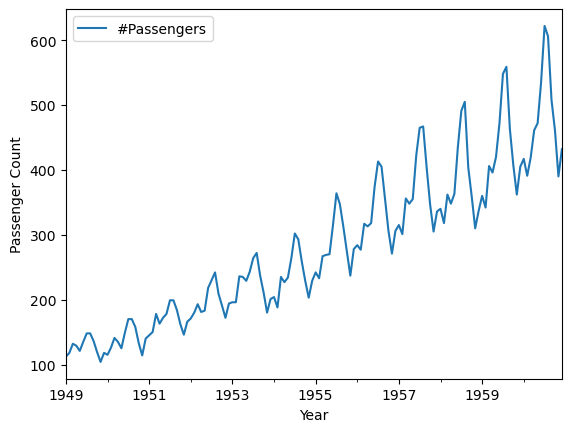

In [7]:
ts.plot()
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

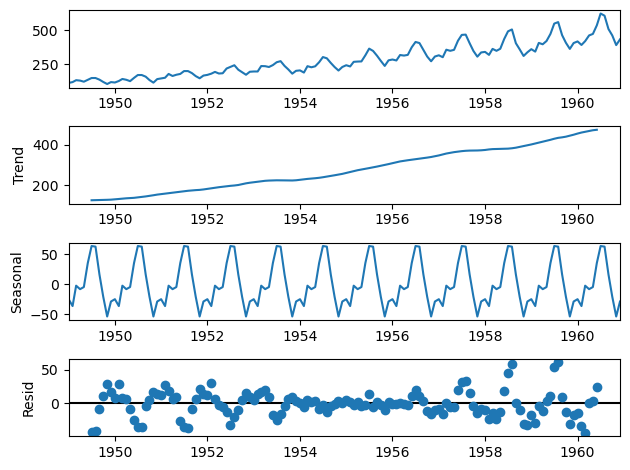

In [8]:
#decomposing ts into trend, seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts, model='additive')
result.plot()
plt.show()

In [9]:
# testing for stationarity of ts using adfuller
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value', '#Lags Used',
                                             'Number of Observations Used'])
    print(dfoutput)

test_stationarity(ts['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


In [10]:
# using differencing method to make ts stationary
data_diff = ts.diff(2).dropna()
test_stationarity(data_diff['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.961695
p-value                          0.038630
#Lags Used                      11.000000
Number of Observations Used    130.000000
dtype: float64


In [11]:
# fitting ts into SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts, order=(1, 2, 1), seasonal_order=(1, 2, 1, 60))
model_fit = model.fit()

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
ts.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [13]:
# Make predictions
forecast = model_fit.predict(start=len(ts), end=len(ts) + 60, typ='levels')
print(forecast)

1961-01-01    439.817584
1961-02-01    417.880666
1961-03-01    467.911867
1961-04-01    472.645815
1961-05-01    471.531685
                 ...    
1965-09-01    584.278140
1965-10-01    521.041417
1965-11-01    425.181489
1965-12-01    475.682425
1966-01-01    480.689758
Freq: MS, Name: predicted_mean, Length: 61, dtype: float64


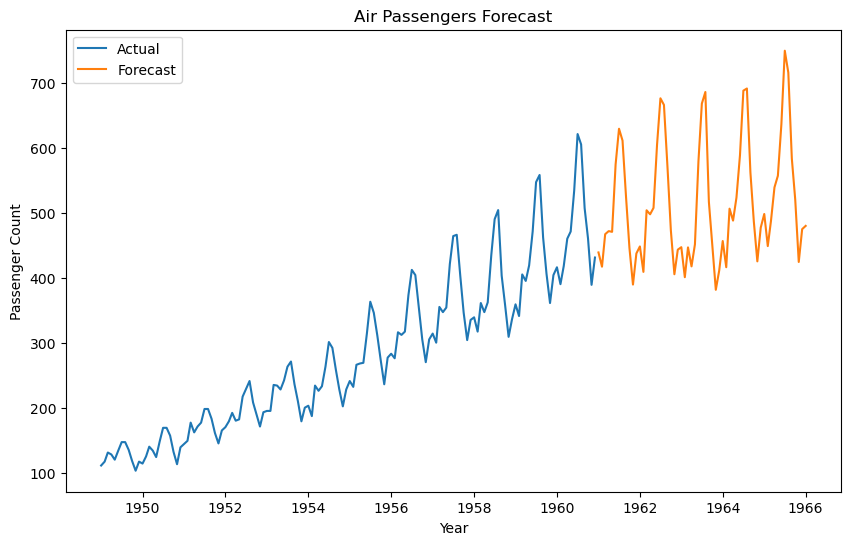

In [15]:
# Plotting the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts['#Passengers'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Air Passengers Forecast')
plt.legend()
plt.show()